In [1]:
from astropy.io import fits

# Abrir el archivo FITS
hdul = fits.open("hst_8317_stis_t-tau_sg230l_o5ex05_cspec.fits")

# Mostrar la estructura del archivo
hdul.info()
# Acceder a la primera tabla de datos
data = hdul[1].data

# Mostrar los nombres de las columnas
print("Columnas disponibles:")
print(data.columns.names)

Filename: hst_8317_stis_t-tau_sg230l_o5ex05_cspec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      48   ()      
  1  SCI           1 BinTableHDU     35   1R x 5C   [1010E, 1010E, 1010E, 1010E, 1010E]   
  2  PROVENANCE    1 BinTableHDU     52   1R x 18C   [64A, 32A, 32A, 32A, 32A, 32A, 32A, 32A, 32A, 32A, D, 32A, D, D, D, D, D, D]   
Columnas disponibles:
['WAVELENGTH', 'FLUX', 'ERROR', 'SNR', 'EFF_EXPTIME']


In [2]:
hdul = fits.open("hst_8317_stis_t-tau_sg230l_o5ex05_cspec.fits")
data = hdul[1].data

# Mostrar las primeras 10 filas
WAVELENGHT = data["WAVELENGTH"]
print(WAVELENGHT)

FLUJO = data["FLUX"]


[[1580.316  1581.8688 1583.4215 ... 3143.8674 3145.42   3146.9727]]


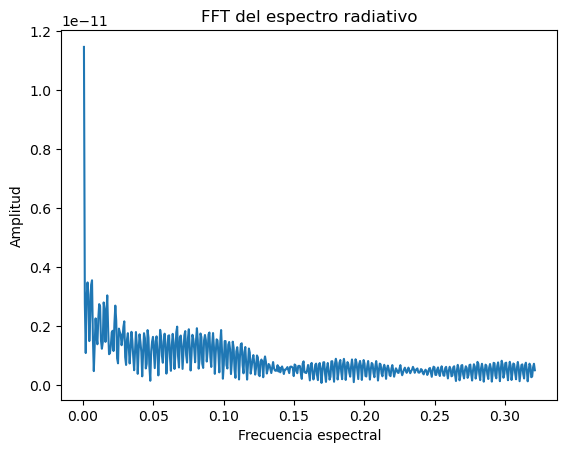

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Long_onda = np.array(WAVELENGHT).flatten()
Flujo = np.array(FLUJO).flatten()

Flujo_arreglado = Flujo - np.mean(FLUJO)

Transofrmada = np.fft.fft(Flujo_arreglado)


Delta_Long = Long_onda[1] - Long_onda[0]
Frecuencia = np.fft.fftfreq(len(Flujo), d=Delta_Long)

Amplitud = np.abs(Transofrmada)

mask = Frecuencia > 0

plt.plot(Frecuencia[mask], Amplitud[mask])
plt.xlabel("Frecuencia espectral")
plt.ylabel("Amplitud")
plt.title("FFT del espectro radiativo")
plt.show()

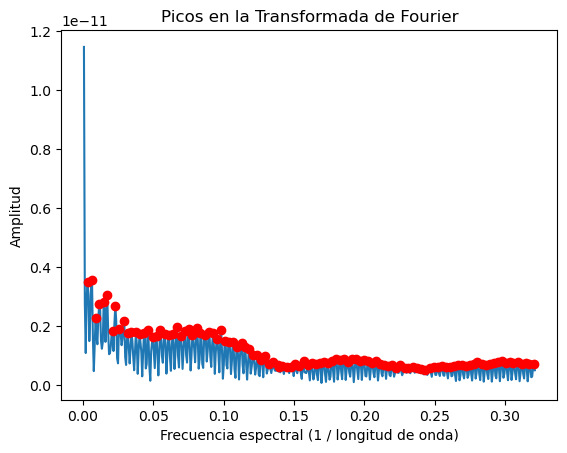

In [6]:
from scipy.signal import find_peaks


# Encontrar picos
peaks, properties = find_peaks(Amplitud[mask], height=0)

# Frecuencias donde hay picos
freq_peaks = Frecuencia[mask][peaks]
amp_peaks = Amplitud[mask][peaks]


plt.plot(Frecuencia[mask], Amplitud[mask])
plt.plot(freq_peaks, amp_peaks, "ro")
plt.xlabel("Frecuencia espectral (1 / longitud de onda)")
plt.ylabel("Amplitud")
plt.title("Picos en la Transformada de Fourier")
plt.show()